In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

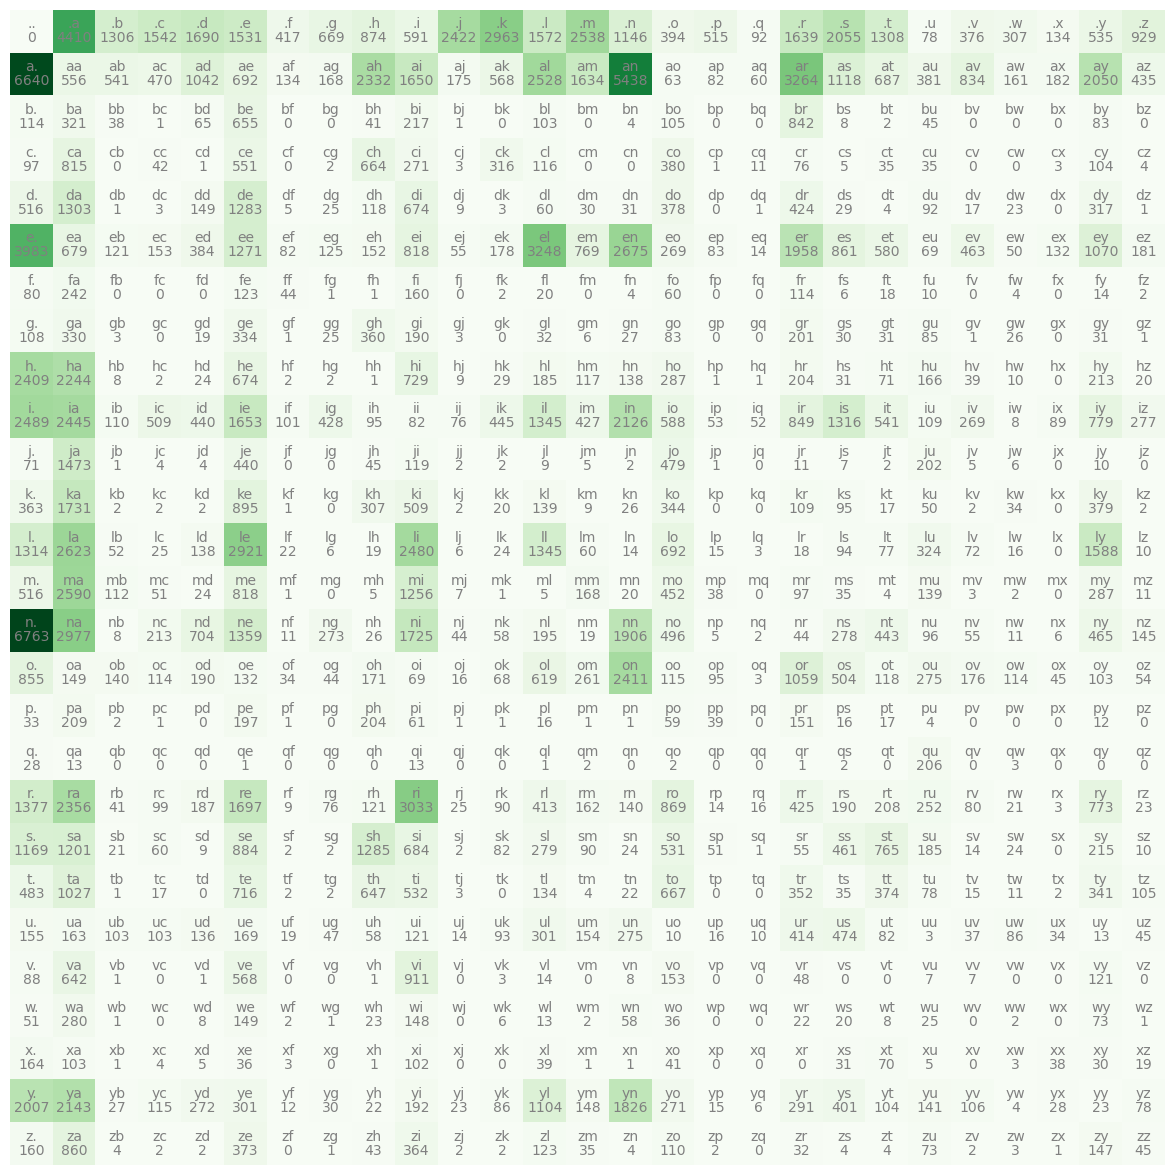

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.imshow(N, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [12]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [13]:
p = (N+1)[0]
p = p / p.sum()
p

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [14]:
g = torch.Generator().manual_seed(41)
for i in range(25):
    out = []
    idx = 0
    while True:
        p = N[idx]
        p = p / p.sum()
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print(''.join(out))

th.
aki.
aymbrighargelisorilyatekeenrie.
khonnamohiemeynnicakreklolelenad.
faekaxtysaynnn.
yaleondelyn.
k.
anelel.
tinoxwakaven.
jela.
conyshanni.
tathosolay.
sianl.
zyainyah.
xogronar.
mala.
brin.
yze.
myea.
alel.
a.
dovecaenilydan.
si.
iara.
zaiudy.


In [15]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [16]:
g = torch.Generator().manual_seed(41)
for i in range(25):
    out = []
    idx = 0
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print(''.join(out))

th.
aki.
aymbrighargelisorilyatekeenrie.
khonnamohiemeynnicakreklolelenad.
faekaxtysaynnn.
yaleondelyn.
k.
anelel.
tinoxwakaven.
jela.
conyshanni.
tathosolay.
sianl.
zyainyah.
xogronar.
mala.
brin.
yze.
myea.
alel.
a.
dovecaenilydan.
si.
iara.
zaiudy.


In [17]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


Create training set

In [18]:
xs, ys = [], []

for w in words[:10]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [19]:
import torch.nn.functional as F

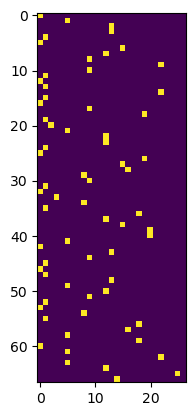

In [20]:
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc);

In [29]:
W = torch.randn((27,27), requires_grad=True)

In [56]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(axis=1, keepdim=True)
loss = -probs[torch.arange(67), ys].log().mean()
loss

tensor(3.7988, grad_fn=<NegBackward0>)

In [57]:
W.grad = None
loss.backward()

In [55]:
W.data += -0.1 * W.grad